In [1]:
import pandas as pd
%load_ext autoreload
%autoreload 2

In [86]:
data_path = "Dataloader/data/data_complete.csv"
data_path_with_month = "Dataloader/data/data_dumb.csv"
data_sin = "Dataloader/data/sin.csv"

In [89]:
import DataLoader, Machine_Model, Engine
import torch, matplotlib.pyplot as plt

sequence = 6
train_percent = 0.8
val_percent = 0.1
random_state = 42
batch_size = 200

dataloader = DataLoader.Health_Dataloader(file_path=data_sin, sequence=sequence,
                                          train_percent=train_percent,
                                          val_percent=val_percent, random_state=random_state, batch_size=batch_size)
train, val, test = dataloader.fit()

print(len(train), len(val), len(test))

INPUT_SIZE = len(train.dataset[0][0][0])  # number of features
HIDDEN_UNITS = 128
NUM_LAYERS = 8
OUTPUT_SIZE = 1
EPOCHS = 1000
model_name = f"Health_predict_RNN_V2"

model0 = Machine_Model.Health_Time_Series(input_size=INPUT_SIZE, hidden_size=HIDDEN_UNITS,
                                          layer_number=NUM_LAYERS, output_size=OUTPUT_SIZE)

loss_fn = torch.nn.MSELoss()
learning_rate = 0.01
optimizer = torch.optim.Adam(model0.parameters(), learning_rate)

engine = Engine.Machine_Engine(model=model0, train_dataloader=train, val_dataloader=val, test_dataloader=test,
                               approach="regression")
model0_results = engine.train(model_name=model_name, loss_fn=loss_fn, optimizer=optimizer, epochs_num=EPOCHS,
                              early_stop_patience=None, writer=False)


11 2 2


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 0 | train: Loss 1.286246 Accuracy -9.6251 | validation: Loss 0.144857 Accuracy -0.0284
Epoch 1 | train: Loss 0.323258 Accuracy -1.6449 | validation: Loss 0.218632 Accuracy -0.5580
Epoch 2 | train: Loss 0.199210 Accuracy -0.6417 | validation: Loss 0.190620 Accuracy -0.3577
Epoch 3 | train: Loss 0.151084 Accuracy -0.2457 | validation: Loss 0.147618 Accuracy -0.0496
Epoch 4 | train: Loss 0.134249 Accuracy -0.1034 | validation: Loss 0.140967 Accuracy -0.0013
Epoch 5 | train: Loss 0.135958 Accuracy -0.1165 | validation: Loss 0.146690 Accuracy -0.0414
Epoch 6 | train: Loss 0.142706 Accuracy -0.1731 | validation: Loss 0.163509 Accuracy -0.1605
Epoch 7 | train: Loss 0.148801 Accuracy -0.2262 | validation: Loss 0.190814 Accuracy -0.3544
Epoch 8 | train: Loss 0.152208 Accuracy -0.2576 | validation: Loss 0.216009 Accuracy -0.5336
Epoch 9 | train: Loss 0.151602 Accuracy -0.2545 | validation: Loss 0.223020 Accuracy -0.5834
Epoch 10 | train: Loss 0.146837 Accuracy -0.2148 | validation: Loss 0.

KeyboardInterrupt: 

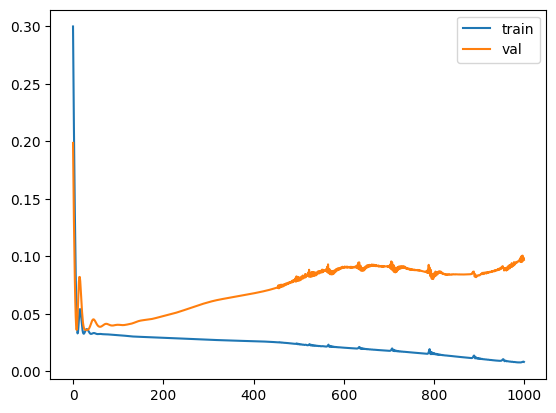

In [79]:
plt.plot(range(len(model0_results["train_loss"])), model0_results["train_loss"], label="train")
plt.plot(range(len(model0_results["val_loss"])), model0_results["val_loss"], label="val")
plt.legend()
plt.show()

44 2 44 2 44 2


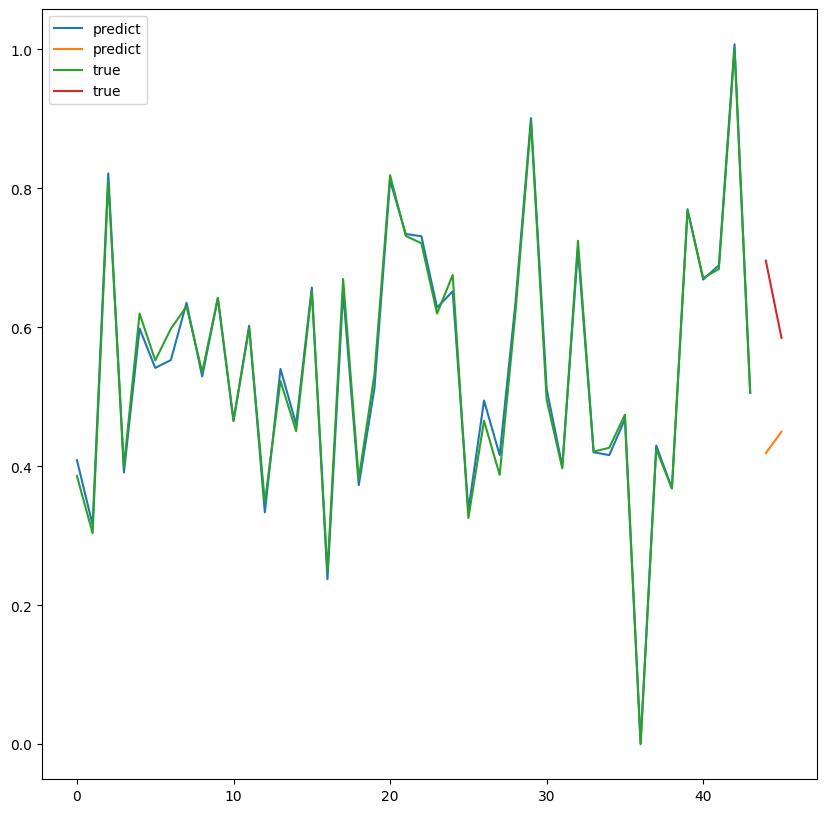

In [76]:
y1 = engine.train_true_predict_list["predict"][-1]
y2 = engine.val_true_predict_list["predict"][-1]

r1 = engine.train_true_predict_list["true"][-1]
r2 = engine.val_true_predict_list["true"][-1]

x1 = [i for i in range(len(r1))]
x2 = [i for i in range(len(r1), len(r1) + len(r2))]

print(len(x1), len(x2), len(y1), len(y2), len(r1), len(r2))
plt.figure(figsize=(10, 10))
plt.plot(x1, y1, label="predict")
plt.plot(x2, y2, label="predict")
plt.plot(x1, r1, label="true")
plt.plot(x2, r2, label="true")
plt.legend()
plt.show()

In [34]:
test_loss, test_acc, true_predict_list = engine.test(loss_fn=loss_fn)
test_acc

[!!!IMPORTANT NOTE!!!]
The test_function provided here is intended solely for the final model analysis and reporting purposes.
Please refrain from using it as a general-purpose function in your own projects. Always refer to
the appropriate train and validation data for developing and fine-tuning your own models.


0.9942651575594049

In [23]:
import DataLoader, Machine_Model, Engine
import torch, matplotlib.pyplot as plt

sequence = 12
train_percent = 0.8
val_percent = 0.1
random_state = 42
batch_size = 100

dataloader = DataLoader.Health_Dataloader(file_path=data_path, sequence=sequence, train_percent=train_percent,
                                          val_percent=val_percent, random_state=random_state, batch_size=batch_size)
train, val, test = dataloader.fit()

print(len(train), len(val), len(test))

INPUT_SIZE = len(train.dataset[0][0][0])  # number of features
HIDDEN_UNITS = 128
NUM_LAYERS = 8
OUTPUT_SIZE = 1
EPOCHS = 2000
model_name = f"Health_predict_LSTM_V1"

model0 = Machine_Model.LSTM_V0(input_size=INPUT_SIZE, hidden_size=HIDDEN_UNITS,
                               layer_number=NUM_LAYERS, output_size=OUTPUT_SIZE)

loss_fn = torch.nn.MSELoss()
learning_rate = 0.001
optimizer = torch.optim.Adam(model0.parameters(), learning_rate)

engine = Engine.Machine_Engine(model=model0, train_dataloader=train, val_dataloader=val, test_dataloader=test,
                               approach="regression")
model0_results = engine.train(model_name=model_name, loss_fn=loss_fn, optimizer=optimizer, epochs_num=EPOCHS,
                              early_stop_patience=None, writer=True)


1 1 1
[INFO] create SummaryWriter saving to runs\Health_predict_LSTM_V1\epochs_2000\2024-01-29-19


  0%|          | 0/2000 [00:00<?, ?it/s]

Epoch 0 | train: Loss 0.366293 Accuracy -10.8290 | validation: Loss 0.276614 Accuracy -21.3044
Epoch 1 | train: Loss 0.322834 Accuracy -9.4256 | validation: Loss 0.237177 Accuracy -18.1245
Epoch 2 | train: Loss 0.281304 Accuracy -8.0844 | validation: Loss 0.197464 Accuracy -14.9222
Epoch 3 | train: Loss 0.239286 Accuracy -6.7275 | validation: Loss 0.155838 Accuracy -11.5658
Epoch 4 | train: Loss 0.194960 Accuracy -5.2960 | validation: Loss 0.111392 Accuracy -7.9819
Epoch 5 | train: Loss 0.147149 Accuracy -3.7520 | validation: Loss 0.065223 Accuracy -4.2591
Epoch 6 | train: Loss 0.096527 Accuracy -2.1172 | validation: Loss 0.024669 Accuracy -0.9891
Epoch 7 | train: Loss 0.049722 Accuracy -0.6057 | validation: Loss 0.016644 Accuracy -0.3420
Epoch 8 | train: Loss 0.032481 Accuracy -0.0489 | validation: Loss 0.076730 Accuracy -5.1870
Epoch 9 | train: Loss 0.082723 Accuracy -1.6715 | validation: Loss 0.072966 Accuracy -4.8836
Epoch 10 | train: Loss 0.079342 Accuracy -1.5622 | validation: Lo

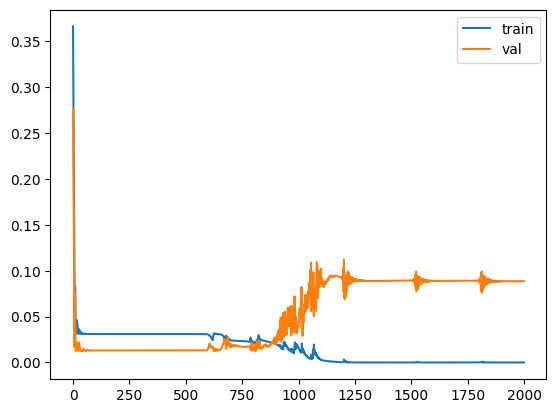

In [24]:
plt.plot(range(len(model0_results["train_loss"])), model0_results["train_loss"], label="train")
plt.plot(range(len(model0_results["val_loss"])), model0_results["val_loss"], label="val")
plt.legend()
plt.show()

In [40]:
test_loss, test_acc, true_predict_list = engine.test(loss_fn=loss_fn)
test_acc

[!!!IMPORTANT NOTE!!!]
The test_function provided here is intended solely for the final model analysis and reporting purposes.
Please refrain from using it as a general-purpose function in your own projects. Always refer to
the appropriate train and validation data for developing and fine-tuning your own models.


-1.012295554421947

In [26]:
import pandas as pd

data = pd.read_csv(data_path)

In [29]:
data = data.iloc[:, 1:]
data

,Unnamed: 0,y,number_of_beds,markaze_behdasht,number_of_labs,number_of_active_beds,number_of_employees,number_of_doctors,number_of_pir_doctors,number_of_stuff,...,number_of_travels_minibus_inside,number_of_travels_minibus_outside,number_of_travels_car_inside,number_of_travels_car_outside,number_of_person_bus_inside,number_of_person_bus_outside,number_of_person_minibus_inside,number_of_person_minibus_outside,number_of_person_car_inside,number_of_person_car_outside
0,1394_01,1664.0,2107.000000,83.000000,290.000000,1747.000000,4665.000000,545.000000,2421.000000,1699.000000,...,1949.0,733.0,615.0,1565.0,155352.0,618303.0,12874.0,9411.0,755.0,2500.0
1,1394_02,2027.0,2107.000000,83.000000,290.000000,1747.000000,4665.000000,545.000000,2421.000000,1699.000000,...,1949.0,733.0,615.0,1565.0,155352.0,618303.0,12874.0,9411.0,755.0,2500.0
2,1394_03,2186.0,2107.000000,83.000000,290.000000,1747.000000,4665.000000,545.000000,2421.000000,1699.000000,...,1949.0,733.0,615.0,1565.0,155352.0,618303.0,12874.0,9411.0,755.0,2500.0
3,1394_04,1800.0,2107.000000,83.000000,290.000000,1747.000000,4665.000000,545.000000,2421.000000,1699.000000,...,1949.0,733.0,615.0,1565.0,155352.0,618303.0,12874.0,9411.0,755.0,2500.0
4,1394_05,2216.0,2107.000000,83.000000,290.000000,1747.000000,4665.000000,545.000000,2421.000000,1699.000000,...,1949.0,733.0,615.0,1565.0,155352.0,618303.0,12874.0,9411.0,755.0,2500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,1401_08,3581.0,2253.714286,85.428571,356.571429,1872.714286,4804.428571,662.714286,2634.285714,1507.428571,...,9487.0,2312.0,2048.0,4270.0,208977.0,822597.0,13863.0,6923.0,2227.0,4639.0
92,1401_09,3570.0,2253.714286,85.428571,356.571429,1872.714286,4804.428571,662.714286,2634.285714,1507.428571,...,9487.0,2312.0,2048.0,4270.0,208977.0,822597.0,13863.0,6923.0,2227.0,4639.0
93,1401_10,3049.0,2253.714286,85.428571,356.571429,1872.714286,4804.428571,662.714286,2634.285714,1507.428571,...,9487.0,2312.0,2048.0,4270.0,208977.0,822597.0,13863.0,6923.0,2227.0,4639.0
94,1401_11,3122.0,2253.714286,85.428571,356.571429,1872.714286,4804.428571,662.714286,2634.285714,1507.428571,...,9487.0,2312.0,2048.0,4270.0,208977.0,822597.0,13863.0,6923.0,2227.0,4639.0


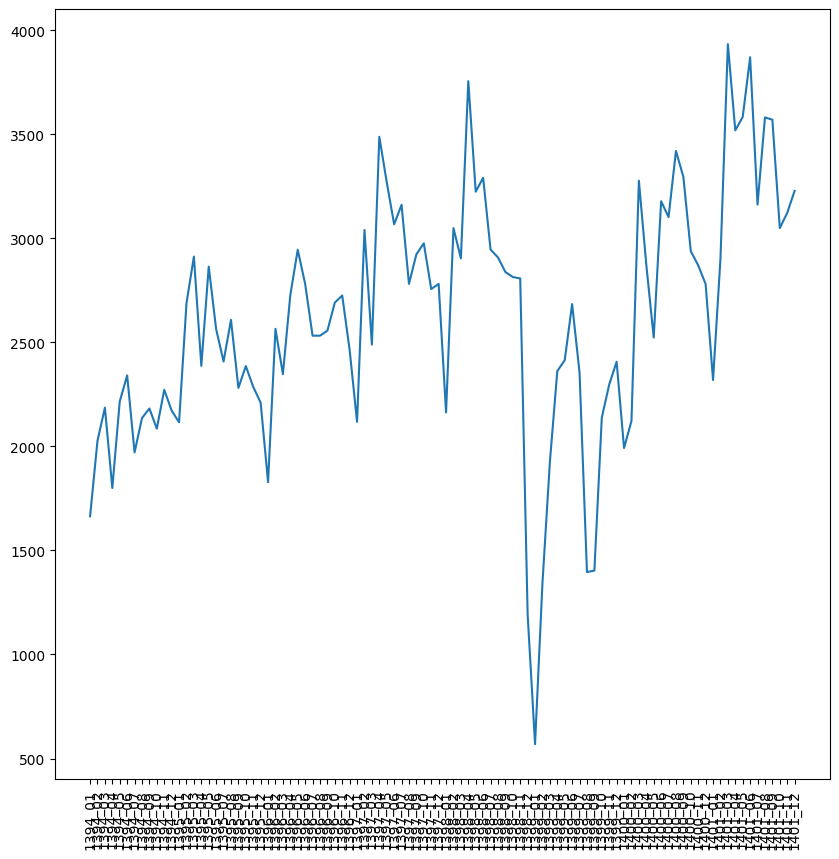

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
# plt.plot(data.iloc[:, 0], data.iloc[:, 1])
plt.plot(data.iloc[:, 0], data.iloc[:, 1])
plt.xticks(rotation=90)
plt.show()


In [36]:
y = data.iloc[:, 1].values

In [37]:
y.argmin()

60

In [38]:
data.iloc[60, :]

Unnamed: 0                            1399_01
y                                       569.0
number_of_beds                         2313.0
markaze_behdasht                         89.0
number_of_labs                          401.0
number_of_active_beds                  1901.0
number_of_employees                    4791.0
number_of_doctors                       740.0
number_of_pir_doctors                  2714.0
number_of_stuff                        1337.0
number_of_persons_in_hotels            8412.0
number_of_travels_bus_inside           9307.0
number_of_travels_bus_outside         44151.0
number_of_travels_minibus_inside       9020.0
number_of_travels_minibus_outside      1278.0
number_of_travels_car_inside           2892.0
number_of_travels_car_outside          2920.0
number_of_person_bus_inside          130409.0
number_of_person_bus_outside         408306.0
number_of_person_minibus_inside       13206.0
number_of_person_minibus_outside       1664.0
number_of_person_car_inside       

In [105]:
import DataLoader, Machine_Model, Engine
import torch, matplotlib.pyplot as plt

sequence = 6
train_percent = 0.8
val_percent = 0.1
random_state = 42
batch_size = 3000

dataloader = DataLoader.Health_Dataloader(file_path=data_sin, sequence=sequence,
                                          train_percent=train_percent,
                                          val_percent=val_percent, random_state=random_state, batch_size=batch_size)
train, val, test = dataloader.fit()

print(len(train), len(val), len(test))

INPUT_SIZE = len(DataLoader.Health_Dataloader.features)  # number of features
HIDDEN_UNITS = 128
OUTPUT_SIZE = 1
EPOCHS = 300
model_name = f"Health_predict_RNN_V2"

model0 = Machine_Model.CNN_V0(input_size=INPUT_SIZE, hidden_size=HIDDEN_UNITS, output_size=OUTPUT_SIZE)

loss_fn = torch.nn.MSELoss()
learning_rate = 0.01
optimizer = torch.optim.Adam(model0.parameters(), learning_rate)

engine = Engine.Machine_Engine(model=model0, train_dataloader=train, val_dataloader=val, test_dataloader=test,
                               approach="regression")
model0_results = engine.train(model_name=model_name, loss_fn=loss_fn, optimizer=optimizer, epochs_num=EPOCHS,
                              early_stop_patience=None, writer=False)


1 1 1


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch 0 | train: Loss 0.390906 Accuracy -2.0710 | validation: Loss 0.580029 Accuracy -4.2264
Epoch 1 | train: Loss 0.626556 Accuracy -3.9223 | validation: Loss 0.183784 Accuracy -0.6560
Epoch 2 | train: Loss 0.208448 Accuracy -0.6376 | validation: Loss 0.133135 Accuracy -0.1996
Epoch 3 | train: Loss 0.147424 Accuracy -0.1582 | validation: Loss 0.207145 Accuracy -0.8665
Epoch 4 | train: Loss 0.219819 Accuracy -0.7269 | validation: Loss 0.218779 Accuracy -0.9713
Epoch 5 | train: Loss 0.232752 Accuracy -0.8285 | validation: Loss 0.188438 Accuracy -0.6979
Epoch 6 | train: Loss 0.205200 Accuracy -0.6121 | validation: Loss 0.145106 Accuracy -0.3075
Epoch 7 | train: Loss 0.163479 Accuracy -0.2843 | validation: Loss 0.107992 Accuracy 0.0269
Epoch 8 | train: Loss 0.127466 Accuracy -0.0014 | validation: Loss 0.092173 Accuracy 0.1695
Epoch 9 | train: Loss 0.112429 Accuracy 0.1167 | validation: Loss 0.100346 Accuracy 0.0958
Epoch 10 | train: Loss 0.121005 Accuracy 0.0494 | validation: Loss 0.11835

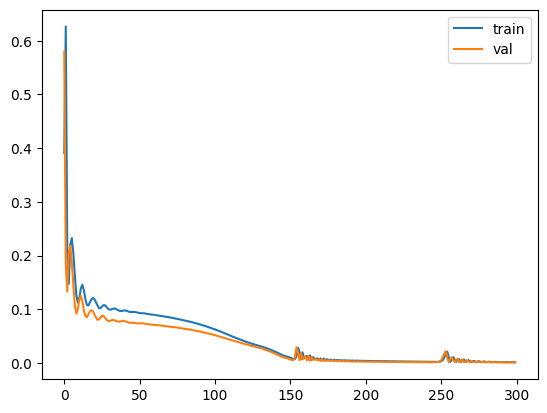

In [106]:
plt.plot(range(len(model0_results["train_loss"])), model0_results["train_loss"], label="train")
plt.plot(range(len(model0_results["val_loss"])), model0_results["val_loss"], label="val")
plt.legend()
plt.show()

50 50 50 50 50 50


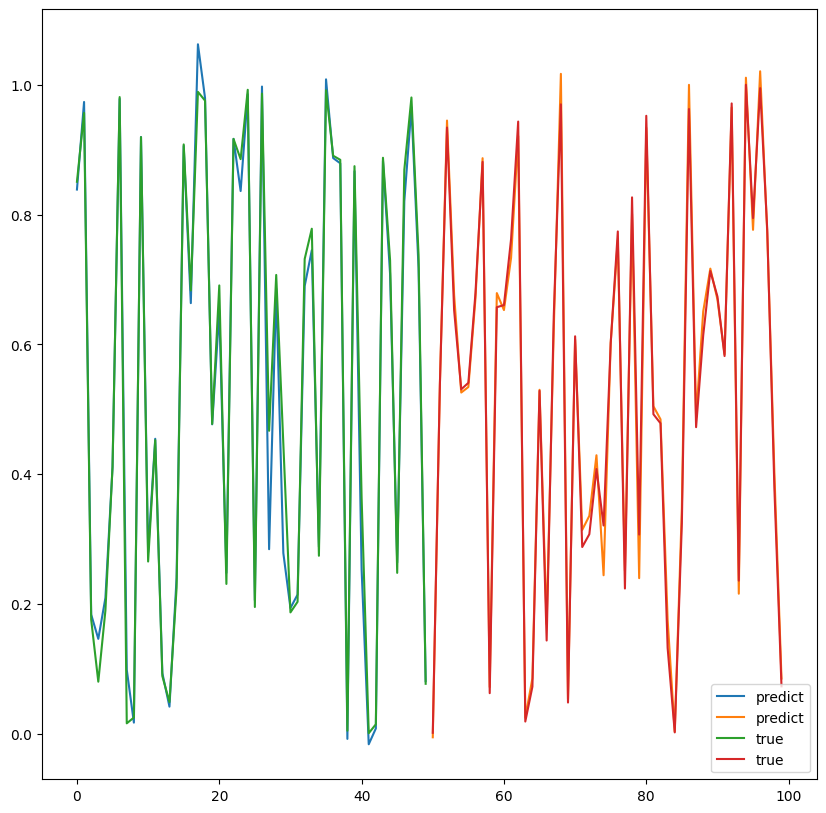

In [109]:
y1 = engine.train_true_predict_list["predict"][-1][0:50]
y2 = engine.val_true_predict_list["predict"][-1][0:50]

r1 = engine.train_true_predict_list["true"][-1][0:50]
r2 = engine.val_true_predict_list["true"][-1][0:50]

x1 = [i for i in range(len(r1))]
x2 = [i for i in range(len(r1), len(r1) + len(r2))]

print(len(x1), len(x2), len(y1), len(y2), len(r1), len(r2))
plt.figure(figsize=(10, 10))
plt.plot(x1, y1, label="predict")
plt.plot(x2, y2, label="predict")
plt.plot(x1, r1, label="true")
plt.plot(x2, r2, label="true")
plt.legend()
plt.show()
